In [9]:
import json
import pandas as pd
import plotly.offline as po
po.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.manifold import TSNE

In [177]:
import codecs
data = []
classes=[]
with codecs.open('data.json') as f:
    big_json = json.load(f)
    for hyp in big_json:
        ents = hyp["entities"]
        text = hyp["text"]
        #for ent in ents:
        #    text = text.replace(ent["value"], ent["type"]).replace("_", " ")
        intent = hyp["intent"]
        #if intent.startswith("misc"):
        #    intent = "ood"
        if text:
            data.append(text)
            classes.append(intent)

In [11]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove2word2vec(glove_input_file="glove/glove.6B.100d.txt", word2vec_output_file="gensim_glove_vectors.txt")

(400000, 100)

In [5]:
from gensim.models.keyedvectors import KeyedVectors
glove_model = KeyedVectors.load_word2vec_format("gensim_glove_vectors.txt", binary=False)

In [29]:
def compute_vec(word):
    return "unk"

In [178]:
dataX = [ [(glove_model[word] if word in glove_model else glove_model[compute_vec(word)]) for word in sentence.split()] for sentence in data]

In [131]:
newclsses = list(set(classes))

newclsses = [nclss.replace(".", " ").replace("_", " ") for nclss in newclsses]

datcl = [ [(glove_model[word] if word in glove_model else glove_model[compute_vec(word)]) for word in sentence.split()] for sentence in newclsses]

dat = []

for d in datcl:
    y = np.mean(d, axis=0)
    dat.append(y)
    
print(len(dat))

28


In [179]:
import numpy as np
X=[]
for xx in dataX:
    y = np.mean(xx, axis=0)
    X.append(y)       
    


In [180]:
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(X)

In [142]:
        
xt = []
yt = []
for value in test:
    xt.append(value[0])
    yt.append(value[1])
        #z.append(value[2])


In [181]:

    x = []
    y = []
    z = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        #z.append(value[2])
        

In [182]:
xxx = set(classes)
l = {}
for i, xx in enumerate(xxx):
    #l[xx] = list(map(int,list(np.binary_repr(i, width=6))))
    l[xx] = i

Classes = [l[ii] for ii in classes]

In [190]:
fig = go.Figure()

trace0 = go.Scatter(
    x = x,
    y = y,
    #z=z,
  # name = Classes,
  #  hoveron = Classes,
    mode = 'markers',
#     text = Target.unique(),
    showlegend = False,
    hoverinfo = "text",
    marker = dict(
        size = 8,
        color = Classes,
        colorscale ='Jet',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        opacity = 0.8
    )
)
#points = [trace0]


trace1 = go.Scatter(
    x = m1,
    y = m2,
    #z=z,
  # name = Classes,
  #  hoveron = Classes,
    mode = 'markers+text',
#     text = Target.unique(),
    showlegend = False,
    text = class_list,
    textposition="top center",
    marker = dict(
        size = 8,
        color = Classes,
        colorscale ='Jet',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        opacity = 0.8
    )
)


layout = dict(title = 't-SNE',
              hovermode= 'closest',
              #yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False),
              showlegend= True
             )

fig.add_trace(trace0)
#fig.add_trace(trace1)
#fig.layout.update(layout)
#fig = dict(data=points, layout=layout)
po.iplot(fig, filename='styled-scatter')

In [55]:
#from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16,16))
#ax = Axes3D(fig)

for data, color, group in zip(new_values, classes, classes):
    a1, b1 = data
    fig.scatter(a1, b1, alpha=0.8, edgecolors='none', s=30, label=group)

#ax.scatter(x, y, z, c= Classes, label = classes)
plt.show()

AttributeError: 'Figure' object has no attribute 'scatter'

<Figure size 1152x1152 with 0 Axes>

In [183]:
class_list = list(set(classes))
class_list

['universals.repeat',
 'navigation.inquire',
 'universals.accept',
 'universals.next',
 'misc.current_location',
 'music.random',
 'messages.write',
 'universals.back',
 'misc.profanity',
 'misc.time',
 'calls.dial',
 'navigation.stop',
 'universals.cancel',
 'misc.switch_off',
 'navigation.start',
 'universals.show',
 'universals.volume_up',
 'music.play',
 'misc.weather',
 'messages.reply',
 'messages.inquire',
 'universals.reject',
 'universals.stop',
 'music.pause',
 'misc.help',
 'universals.select',
 'universals.volume_down',
 'misc.unsupported']

In [152]:
from collections import defaultdict

In [184]:
class_accums = defaultdict(list)
for class_name in class_list:
    for i, cls_name in enumerate(classes):
        if (cls_name == class_name):
            class_accums[class_name].append(new_values[i])

In [185]:
class_means = {}
for class_name in class_list:
    class_means[class_name] = np.mean(class_accums[class_name], axis=0)

In [187]:
m1 =[]
m2 = []

for kkk in centers:
    m1.append(kkk[0])
    m2.append(kkk[1])

In [169]:
class_means["misc.unsupported"]

array([  5.0378704, -10.17145  ], dtype=float32)

In [186]:
centers = []
for class_name in class_list:
    centers.append(class_means[class_name])

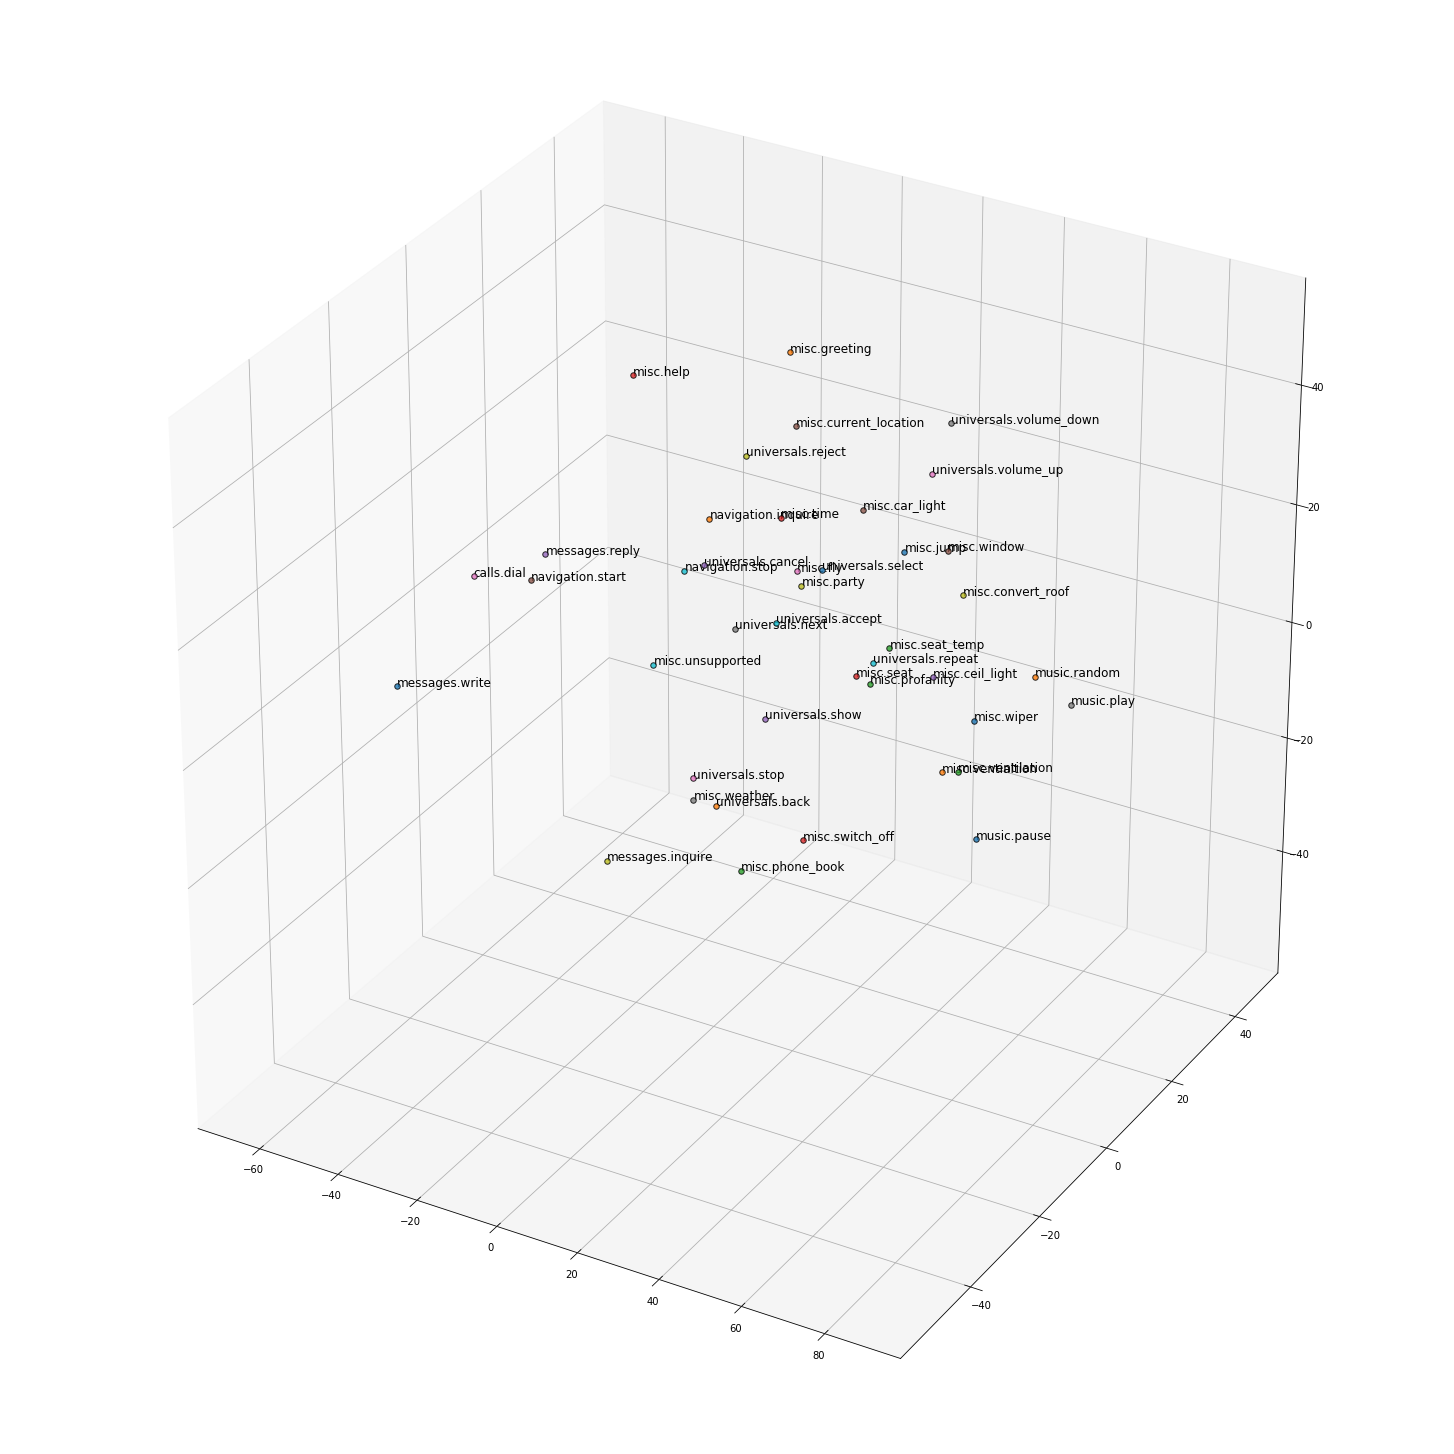

In [73]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,20))
ax = Axes3D(fig)

for data, color, group in zip(centers, clss_list, class_list):
    a1, b1, c1 = data
    ax.scatter(a1, b1, c1, alpha=0.8, edgecolors='none', s=30, label=group)
    ax.text(a1, b1, c1, group, size=12, zorder=1, color="k")

#ax.scatter(x, y, z, c= Classes, label = classes)
plt.show()

In [48]:
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(X)

In [57]:
class_accums = defaultdict(list)
for class_name in clss_list:
    for i, cls_name in enumerate(classes):
        if (cls_name == class_name):
            class_accums[class_name].append(new_values[i])

In [58]:
class_means = {}
for class_name in clss_list:
    class_means[class_name] = np.mean(class_accums[class_name], axis=0)

In [59]:
centers = []
for class_name in clss_list:
    centers.append(class_means[class_name])

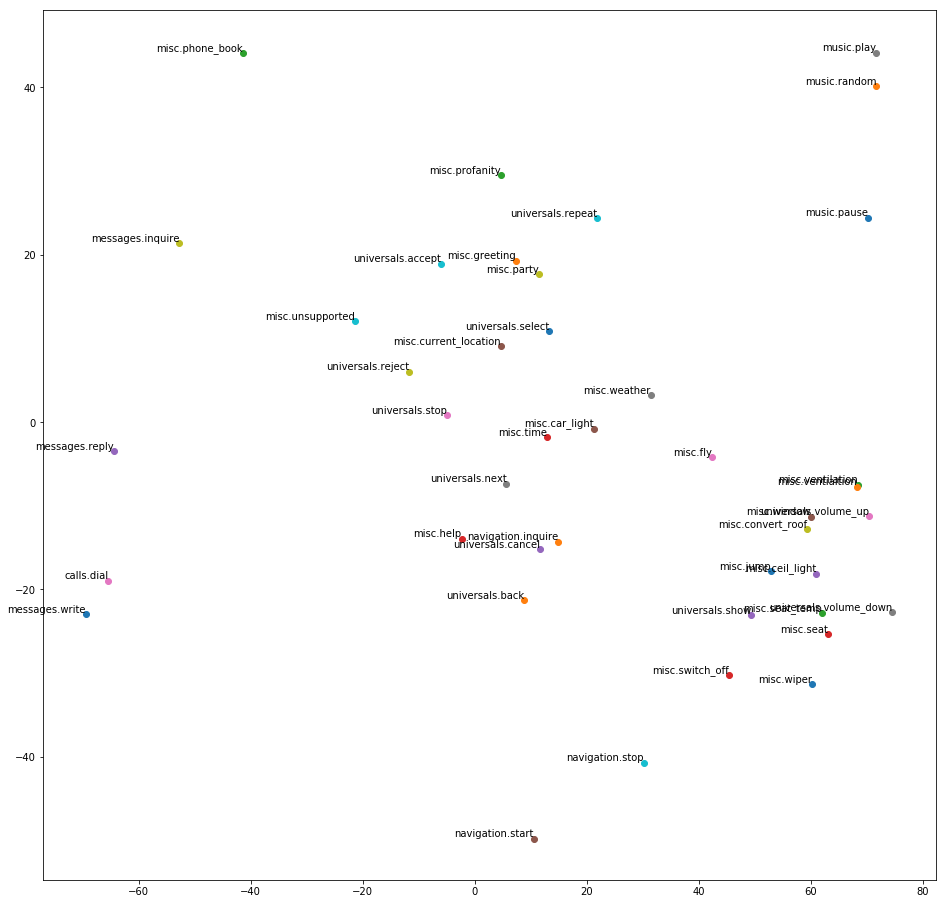

In [63]:
    plt.figure(figsize=(16, 16)) 
    for i in range(len(centers)):
        plt.scatter(centers[i][0],centers[i][1])
        plt.annotate(clss_list[i],
                     xy=(centers[i][0], centers[i][1]),
                     ha='right',
                     va='bottom')
    plt.show()

In [56]:
clss_list = list(class_list)